# Sheet Music Notation Interpreter

## Section 1. Introduction

### Our Interpreter System: Sheet Music Notation

This project implements a **Sheet Music Notation Interpreter** - a domain-specific language (DSL) interpreter designed to convert human-readable musical notation text into visual sheet music and playable MIDI files.

**Why This Project?**

Musical notation is a universal language, yet creating sheet music typically requires:
- Expensive proprietary software (Sibelius, Finale)
- Steep learning curves for GUI-based editors
- Manual mouse-clicking for each note placement

Our interpreter democratizes music composition by allowing musicians to:
1. Write music using simple, intuitive text commands
2. Generate professional-quality sheet music automatically
3. Hear their compositions via MIDI playback
4. Edit and iterate quickly without GUI overhead

**Real-World Applications:**
- **Music Education**: Students can learn composition without expensive software
- **Quick Sketching**: Composers can rapidly prototype musical ideas
- **Accessibility**: Text-based input is more accessible than complex GUIs
- **Version Control**: Text-based music can be tracked with Git
- **Automated Music Generation**: Programs can generate musical notation programmatically

**Target Task:**

Our interpreter processes structured text commands to:
- Define musical parameters (key signature, time signature, tempo)
- Specify notes, chords, rests, and their durations
- Support multiple voices/parts
- Generate visual sheet music (via music21 and MuseScore)
- Export to MusicXML and MIDI formats

## Section 2. Description of the Input Language

### Language Overview

Our **Sheet Music Notation Language** is a declarative, text-based language designed to express musical compositions in a human-readable format. The language prioritizes clarity and simplicity while maintaining the expressive power needed for complex musical compositions.

### Inspiration and Rationale

The language design was inspired by:
- **LilyPond** - text-based music engraving
- **ABC notation** - simple ASCII music notation
- **Natural language** - using words like "Set", "In measure", "to"

**Design Philosophy:**
- **Readability First**: Commands read like English sentences
- **Minimal Syntax**: Fewer special characters, more keywords
- **Hierarchical Structure**: Clear organization of global settings, voices, and measures
- **Extensibility**: Easy to add new features (dynamics, articulations, etc.)

### Language Structure

#### 1. **Tokens (Keywords, Symbols, Operators)**

Our lexer recognizes the following token types:

**Keywords:**
- `Set`, `set` - Begin configuration statement
- `Key`, `key` - Key signature setting
- `Time`, `time` - Time signature setting
- `Signature`, `signature` - Part of time signature
- `Tempo`, `tempo` - Tempo setting
- `Voice`, `voice` - Voice/part declaration
- `Rest`, `rest` - Rest notation
- `In`, `in` - Measure context
- `Measure`, `measure` - Measure number
- `To`, `to` - Assignment operator

**Literals:**
- `NOTE` - Musical pitches: `C4`, `F#3`, `Bb5` (letter + optional sharp/flat + octave)
- `NUMBER` - Integers: `1`, `2`, `120`, `4`
- `DURATION` - Note lengths: `whole`, `half`, `quarter`, `eighth`, `sixteenth`
- `IDENT` - Identifiers: `major`, `minor`, `C`, `G`

**Symbols:**
- `:` (COLON) - Separates declarations from content
- `,` (COMMA) - Separates list items
- `/` (SLASH) - Divides time signature fractions
- `.` (DOT) - Dotted duration modifier
- `[` `]` (BRACKETS) - Chord notation

#### 2. **Grammar and Syntax**

**Global Settings:**
```
Set key to <key_name> <mode>
Set time signature to <numerator>/<denominator>
Set tempo to <bpm>
```

**Voice Declaration (Multi-part music):**
```
Voice <number>:
    In measure <number>:
        <note_list>
    In measure <number>:
        <note_list>
```

**Measure Content (Legacy syntax):**
```
In measure <number>:
    <note_list>
```

**Note List:**
```
<note_entry>, <note_entry>, ...
```

**Note Entry Types:**
1. **Single Note**: `<pitch> <duration>[.]`
   - Example: `C4 quarter`, `F#5 eighth.`
2. **Chord**: `[<pitch>, <pitch>, ...] <duration>[.]`
   - Example: `[C4, E4, G4] whole`
3. **Rest**: `Rest <duration>[.]`
   - Example: `Rest quarter`, `Rest half.`

#### 3. **Valid Input Examples**

**Example 1: Simple Melody**
```
Set key to C major
Set time signature to 4/4
In measure 1:
    C4 quarter, D4 quarter, E4 quarter, F4 quarter
In measure 2:
    G4 half, Rest half
```

**Example 2: Multi-Voice Composition**
```
Set key to G major
Set time signature to 3/4
Set tempo to 120

Voice 1:
    In measure 1:
        G4 quarter, B4 quarter, A4 quarter
    In measure 2:
        D5 half, Rest quarter

Voice 2:
    In measure 1:
        G3 quarter, D4 quarter, D4 quarter
    In measure 2:
        G3 half, Rest quarter
```

**Example 3: Chords and Dotted Notes**
```
Set key to F major
Set time signature to 4/4
In measure 1:
    [F4, A4, C5] half., D5 quarter
In measure 2:
    [C4, E4, G4] whole
```

#### 4. **Invalid Input Examples**

**Invalid 1: Missing keyword**
```
key to C major          # Error: Missing "Set"
```
*Response:* `SyntaxError: Unexpected statement start: KEY`

**Invalid 2: Wrong note format**
```
In measure 1:
    H4 quarter            # Error: H is not a valid note
```
*Response:* `SyntaxError: Expected token type NOTE, got IDENT`

**Invalid 3: Missing duration**
```
In measure 1:
    C4                    # Error: Duration required
```
*Response:* `SyntaxError: Expected token type DURATION, got EOF`

**Invalid 4: Incomplete time signature**
```
Set time signature to 4   # Error: Missing denominator
```
*Response:* `SyntaxError: Expected token type SLASH, got EOF`

**Invalid 5: Unknown token**
```
In measure 1:
    C4 quarter @ D4       # Error: @ is not recognized
```
*Response:* `SyntaxError: Unknown token '@' at pos X`

### Design Rules

1. **Case Insensitive Keywords**: `Set` = `set`, `Voice` = `voice`
2. **Whitespace Insensitive**: Indentation is optional (for readability)
3. **Comma-Separated Lists**: Notes in a measure are separated by commas
4. **Sequential Measures**: Measures should be numbered sequentially
5. **Dotted Durations**: Add `.` after duration for dotted notes (1.5× length)
6. **Sharp/Flat Notation**: `#` for sharp, `b` for flat (e.g., `C#4`, `Bb3`)

## Section 3. Libraries and Dependencies

### Built-in Python Libraries

1. **`re`** (Regular Expressions)
   - **Purpose**: Pattern matching for lexical analysis
   - **Usage**: Tokenizing input text, recognizing notes, keywords, and symbols
   
2. **`dataclasses`**
   - **Purpose**: Creating simple data classes with minimal boilerplate
   - **Usage**: Defining the `Token` class structure
   
3. **`typing`**
   - **Purpose**: Type hints for better code documentation and IDE support
   - **Usage**: `List`, `Optional`, `Any`, `Dict`, `Tuple` type annotations
   
4. **`tempfile`**
   - **Purpose**: Creating temporary files safely
   - **Usage**: Generating temporary PNG files for music rendering

### Third-Party Libraries

1. **`music21`** (Version 9.1+)
   - **Purpose**: Music information retrieval and analysis toolkit
   - **Usage**: 
     - Creating musical scores (`stream.Score`, `stream.Part`, `stream.Measure`)
     - Representing notes, chords, and rests
     - Handling key signatures, time signatures, and tempo markings
     - Exporting to MusicXML and MIDI formats
     - Rendering sheet music as images (via MuseScore integration)
   - **Installation**: `pip install music21`

2. **`ipywidgets`**
   - **Purpose**: Interactive widgets for Jupyter notebooks
   - **Usage**:
     - Creating text input fields and buttons
     - Building interactive UI for the notation editor
     - Real-time rendering of sheet music
   - **Installation**: `pip install ipywidgets`

3. **`IPython.display`**
   - **Purpose**: Rich display capabilities in Jupyter
   - **Usage**:
     - Displaying images (PNG sheet music)
     - Clearing and updating output areas
     - Rendering HTML content
   - **Installation**: Included with Jupyter/IPython

### External Dependencies

1. **MuseScore 3/4**
   - **Purpose**: Music notation software used by music21 for rendering
   - **Usage**: Converting MusicXML to PNG images and playing MIDI
   - **Installation**: System-dependent (e.g., `sudo apt install musescore3` on Linux)
   - **Configuration**: Path must be set in music21's user settings

## Section 4. System Design and Architecture

### Overall Architecture

Our interpreter follows the classic **three-stage compilation model**:

```
Input Text → [Lexer] → Tokens → [Parser] → AST → [Semantic Analyzer] → Output
```

Each component has a distinct responsibility, following the **separation of concerns** principle.

---

### 1. **Lexer (Tokenizer)**

**Responsibility:** Convert raw text into a stream of tokens

**Input:** String of musical notation text
**Output:** List of `Token` objects with type, value, and position

**Key Features:**
- **Regex-based pattern matching**: Uses compiled regex patterns for efficient tokenization
- **Token type identification**: Recognizes 23 different token types
- **Error detection**: Raises `SyntaxError` for unrecognized characters
- **Whitespace handling**: Automatically filters out whitespace and newlines

**Design Decision:** We chose regex-based lexing because:
- Musical notation has relatively simple lexical structure
- Regex provides excellent performance for pattern matching
- Easy to add new token types by extending the `TokenSpec` list
- Python's `re` module is well-tested and reliable

---

### 2. **Parser**

**Responsibility:** Build an Abstract Syntax Tree (AST) from tokens

**Input:** List of tokens
**Output:** Hierarchical AST representing the musical structure

**Parsing Method:** **Recursive Descent Parser**
- **Top-down parsing** strategy
- Each grammar rule has a corresponding parsing function
- Uses **lookahead** (`peek()`) to make parsing decisions
- Validates syntax and raises errors for malformed input

**AST Structure:**
```python
("list", [
    ("set_key", "C", "major"),
    ("set_time_signature", 4, 4),
    ("voice", 1, [
        ("measure", 1, [
            ("note", "C4", "quarter"),
            ("chord", ["C4", "E4", "G4"], "whole"),
            ("rest", "quarter")
        ])
    ])
])
```

**Design Decisions:**
- **Recursive descent**: Simple to implement, easy to debug, matches grammar structure
- **Tuple-based AST**: Lightweight, easy to pattern match, no complex node classes needed
- **Error recovery**: Immediate failure with descriptive errors rather than attempting recovery

**Grammar Productions:**
```
program        → statement_list
statement      → set_statement | voice_statement | measure_statement
set_statement  → SET (key_stmt | time_stmt | tempo_stmt)
voice_statement → VOICE NUMBER : measure_list
measure_list   → IN MEASURE NUMBER : note_list
note_list      → note_entry (, note_entry)*
note_entry     → note | chord | rest
note           → NOTE DURATION [DOT]
chord          → [ NOTE (, NOTE)* ] DURATION [DOT]
rest           → REST DURATION [DOT]
```

---

### 3. **Semantic Analyzer (Executor/Interpreter Engine)**

**Responsibility:** Execute the AST and produce musical output

**Input:** AST from parser
**Output:** MusicXML file, MIDI playback, PNG sheet music

**Key Features:**
- **Two-pass analysis**:
  1. **First pass**: Collect global settings and voice data
  2. **Second pass**: Create music21 parts and measures
- **Music21 integration**: Translates AST to music21's object model
- **Multi-voice support**: Creates separate parts for each voice
- **Format conversion**: Handles notation differences (e.g., "sixteenth" → "16th")

**Design Decision:** Two-pass analysis ensures global settings are applied to all voices consistently, even if voices are declared before settings.

---

### Data Flow Diagram

```
┌─────────────────┐
│   Input Text    │ (User types notation)
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│     LEXER       │ Tokenization
│  (re.finditer)  │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│  Token Stream   │ [Token("SET"), Token("KEY"), ...]
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│     PARSER      │ Syntax Analysis
│ (Recursive      │
│  Descent)       │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│      AST        │ ("list", [("set_key", ...), ...])
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│   SEMANTIC      │ Semantic Analysis & Execution
│   ANALYZER      │
└────────┬────────┘
         │
         ├──────────────┐
         ▼              ▼
┌──────────────┐  ┌──────────────┐
│ MusicXML     │  │ MIDI File    │
│ (output.xml) │  │ (test.midi)  │
└──────────────┘  └──────────────┘
         │              │
         ▼              ▼
┌─────────────────────────┐
│  MuseScore Rendering    │
└────────┬────────────────┘
         ▼
┌─────────────────┐
│  PNG Display    │ (Visual Output)
└─────────────────┘
```

---

### Error Handling Strategies

#### 1. **Lexical Errors** (Lexer)
- **Detection**: Unknown characters that don't match any token pattern
- **Response**: Raise `SyntaxError` with character and position
- **Example**: `SyntaxError: Unknown token '@' at pos 25`

#### 2. **Syntax Errors** (Parser)
- **Detection**: Unexpected tokens, missing required tokens
- **Response**: Raise `SyntaxError` with expected vs. actual token
- **Example**: `SyntaxError: Expected token type DURATION, got COMMA`

#### 3. **Semantic Errors** (Analyzer)
- **Detection**: Invalid AST structure, music21 errors
- **Response**: Raise `ValueError` or catch music21 exceptions
- **Example**: `ValueError: AST must be a list of statements`

#### 4. **Runtime Errors** (UI/Rendering)
- **Detection**: MuseScore not found, file I/O errors
- **Response**: Try-except blocks with user-friendly messages
- **Example**: Display "Render error: Could not generate PNG"

**Error Handling Philosophy:**
- **Fail fast**: Detect errors early in the pipeline
- **Descriptive messages**: Help users understand what went wrong
- **Graceful degradation**: UI shows error messages instead of crashing

---

### Justification of Design Decisions

1. **Why Regex-based Lexer?**
   - Simple, efficient, and sufficient for our token complexity
   - Python's `re` module is optimized and well-maintained
   - Easy to extend with new token types

2. **Why Recursive Descent Parser?**
   - Direct mapping from grammar rules to code
   - Easy to understand and debug
   - No external parser generator needed
   - Good error messages with lookahead

3. **Why Tuple-based AST?**
   - Lightweight and fast
   - Easy pattern matching with tuple unpacking
   - No need for complex class hierarchies
   - Functional programming style

4. **Why music21 Library?**
   - Industry-standard music analysis toolkit
   - Built-in MusicXML and MIDI export
   - Integration with MuseScore for rendering
   - Rich musical object model

5. **Why Two-pass Semantic Analysis?**
   - Global settings can appear anywhere in the file
   - Voice declarations need consistent settings
   - Separation of data collection and code generation

## Section 5. Implementation Details

This section demonstrates the complete implementation of our Sheet Music Notation Interpreter, broken down into its core components: Lexer, Parser, and Semantic Analyzer. Each subsection includes the actual implementation code with detailed explanations.

### 5.1 Imports

The following imports provide the necessary functionality for our interpreter:

- **`re`**: Regular expression operations for pattern matching in the lexer
- **`dataclasses.dataclass`**: Decorator for creating the Token data class
- **`typing`**: Type hints for better code documentation and type checking

In [35]:
import re
from dataclasses import dataclass
from typing import List

### 5.2 Lexer (Tokenizer)

The **Lexer** is responsible for converting raw input text into a stream of tokens. It performs **lexical analysis** by:

1. **Defining token patterns** using regular expressions
2. **Scanning the input** character by character
3. **Matching patterns** to identify token types
4. **Creating Token objects** with type, value, and position information

**Key Components:**

- **`TokenSpec`**: A list of (token_name, regex_pattern) tuples defining all recognized tokens
- **`Token` dataclass**: Represents a single token with its type, value, and position
- **`Lexer` class**: Performs the tokenization process

**Implementation Strategy:**
- Uses Python's `re.finditer()` for efficient pattern matching
- Combines all patterns into a single regex with named capture groups
- Filters out whitespace and newlines
- Raises errors for unrecognized characters

In [22]:
TokenSpec = [
    ("NUMBER",      r"\d+"),
    ("NOTE",        r"[A-G](?:#|b)?\d"),        # e.g., C4, F#3, Bb5
    ("DURATION",    r"whole|half|quarter|eighth|sixteenth"), # common durations
    ("SET",         r"Set\b|set\b"),
    ("KEY",         r"key\b|Key\b"),
    ("TIME",        r"time\b|Time\b"),
    ("SIGNATURE",   r"signature\b|Signature\b"),
    ("TEMPO",       r"tempo\b|Tempo\b"),
    ("VOICE",       r"Voice\b|voice\b"),
    ("REST",        r"Rest\b|rest\b"),           # For rest notation
    ("IN",          r"In\b|in\b"),
    ("MEASURE",     r"measure\b|Measure\b"),
    ("TO",          r"to\b|To\b"),
    ("COLON",       r":"),
    ("COMMA",       r","),
    ("SLASH",       r"/"),
    ("DOT",         r"\."),                     # For dotted durations
    ("LBRACKET",    r"\["),                     # For chord notation
    ("RBRACKET",    r"\]"),                     # For chord notation
    ("IDENT",       r"[A-Za-z+#]+"),            # words like 'C', 'major', 'minor'
    ("NEWLINE",     r"\n"),
    ("WS",          r"[ \t]+"),
    ("UNKNOWN",     r"."),
]
tok_regex = "|".join(f"(?P<{name}>{pattern})" for name, pattern in TokenSpec)

@dataclass
class Token:
    type: str
    value: str
    pos: int

In [23]:
class Lexer:
    def __init__(self, text: str):
        self.text = text
        self.pos = 0
        self.tokens: List[Token] = []

    def tokenize(self) -> List[Token]:
        for m in re.finditer(tok_regex, self.text):
            kind = m.lastgroup
            value = m.group()
            pos = m.start()
            if kind == "WS" or kind == "NEWLINE":
                continue
            if kind == "UNKNOWN":
                raise SyntaxError(f"Unknown token {value!r} at pos {pos}")
 
            tok = Token(kind, value, pos)
            self.tokens.append(tok)
        self.tokens.append(Token("EOF", "", len(self.text)))
        return self.tokens

### 5.3 Testing the Lexer

This cell demonstrates the lexer in action by tokenizing a sample musical notation. The output shows each token with its type, value, and position in the input string.

In [24]:
sample = """
Set key to G major
Set time signature to 3/4

In measure 1:
        G4 quarter., B4 quarter, A4 sixteenth.
In measure 2:
        C5 half, Rest quarter
"""
lexer = Lexer(sample.strip())
tokens = lexer.tokenize()
for token in tokens:
    print(token)

Token(type='SET', value='Set', pos=0)
Token(type='KEY', value='key', pos=4)
Token(type='TO', value='to', pos=8)
Token(type='IDENT', value='G', pos=11)
Token(type='IDENT', value='major', pos=13)
Token(type='SET', value='Set', pos=19)
Token(type='TIME', value='time', pos=23)
Token(type='SIGNATURE', value='signature', pos=28)
Token(type='TO', value='to', pos=38)
Token(type='NUMBER', value='3', pos=41)
Token(type='SLASH', value='/', pos=42)
Token(type='NUMBER', value='4', pos=43)
Token(type='IN', value='In', pos=46)
Token(type='MEASURE', value='measure', pos=49)
Token(type='NUMBER', value='1', pos=57)
Token(type='COLON', value=':', pos=58)
Token(type='NOTE', value='G4', pos=68)
Token(type='DURATION', value='quarter', pos=71)
Token(type='DOT', value='.', pos=78)
Token(type='COMMA', value=',', pos=79)
Token(type='NOTE', value='B4', pos=81)
Token(type='DURATION', value='quarter', pos=84)
Token(type='COMMA', value=',', pos=91)
Token(type='NOTE', value='A4', pos=93)
Token(type='DURATION', value

### 5.4 Parser

The **Parser** performs **syntax analysis** by converting the token stream into an Abstract Syntax Tree (AST). It uses a **recursive descent parsing** strategy where:

1. Each grammar production has a corresponding parsing method
2. The parser uses **lookahead** (`peek()`) to make parsing decisions
3. The `eat()` method consumes tokens and validates their types
4. Syntax errors are detected and reported with descriptive messages

**Parser Methods:**

- **`parse_list()`**: Entry point, parses the entire program
- **`parse_statement()`**: Dispatches to specific statement parsers
- **`parse_set_key_stmt()`**: Parses key signature statements
- **`parse_set_time_signature_stmt()`**: Parses time signature statements
- **`parse_set_tempo_stmt()`**: Parses tempo statements
- **`parse_voice_stmt()`**: Parses voice declarations with multiple measures
- **`parse_measure_stmt()`**: Parses individual measure statements
- **`parse_note_list()`**: Parses comma-separated note entries
- **`parse_note_entry()`**: Dispatches to note, chord, or rest parsers
- **`parse_chord_entry()`**: Parses chord notation `[C4, E4, G4] duration`
- **`parse_rest_entry()`**: Parses rest notation `Rest duration`

**AST Format:**
The parser produces a tuple-based AST that is easy to traverse and pattern match.

In [25]:
class Parser:
    def __init__(self, tokens):
        self.tokens = tokens
        self.pos = 0

    def peek(self):
        if self.pos < len(self.tokens):
            return self.tokens[self.pos]
        return None
    
    def eat(self, expected_type=None):
        token = self.peek()
        if token is None:
            raise SyntaxError("Unexpected end of input")    
        if expected_type and token.type != expected_type:
            raise SyntaxError(f"Expected token type {expected_type}, got {token.type}")
        self.pos += 1
        return token
    
    def parse_list(self):
        statements = []
        while self.peek().type != "EOF":
            statements.append(self.parse_statement())
        return ("list", statements)
    
    def parse_statement(self):
        token = self.peek()
        if token.type == "SET":
            self.eat("SET")
            next_tok = self.peek()
            if next_tok.type == "KEY":
                return self.parse_set_key_stmt()
            elif next_tok.type == "TIME":
                return self.parse_set_time_signature_stmt()
            elif next_tok.type == "TEMPO":
                return self.parse_set_tempo_stmt()
            else:
                raise SyntaxError(f"Unexpected token {next_tok.type} after SET")
        
        elif token.type == "VOICE":
            return self.parse_voice_stmt()
        
        elif token.type == "IN":
            self.eat("IN")
            return self.parse_measure_stmt()
        else:
            raise SyntaxError(f"Unexpected statement start: {token.type}")
        
    def parse_set_key_stmt(self):
        self.eat("KEY")
        self.eat("TO")
        key_name = self.eat("IDENT").value
        mode = self.eat("IDENT").value
        return ("set_key", key_name, mode)
    
    def parse_set_time_signature_stmt(self):
        self.eat("TIME")
        self.eat("SIGNATURE")
        self.eat("TO")
        numerator = int(self.eat("NUMBER").value)
        self.eat("SLASH")
        denominator = int(self.eat("NUMBER").value)
        return ("set_time_signature", numerator, denominator)
    
    def parse_set_tempo_stmt(self):
        self.eat("TEMPO")
        self.eat("TO")
        bpm = int(self.eat("NUMBER").value)
        return ("set_tempo", bpm)

    def parse_voice_stmt(self):
        self.eat("VOICE")
        voice_num = int(self.eat("NUMBER").value)
        self.eat("COLON")
        measures = []
        
        # Parse all measures in this voice
        while self.peek() and self.peek().type == "IN":
            self.eat("IN")
            measures.append(self.parse_measure_stmt_content())
        
        return ("voice", voice_num, measures)

    def parse_measure_stmt(self):
        # For backward compatibility with old syntax
        measure_data = self.parse_measure_stmt_content()
        return ("measure", measure_data[1], measure_data[2])

    def parse_measure_stmt_content(self):
        self.eat("MEASURE")
        measure_num = int(self.eat("NUMBER").value)
        self.eat("COLON")
        notes = []
        self.parse_note_list(notes)
        return ("measure", measure_num, notes)      
    
    def parse_note_list(self, notes):
        notes.append(self.parse_note_entry())
        while self.peek() and self.peek().type == "COMMA":
            self.eat("COMMA")
            # Check if next token starts a new measure or voice
            if self.peek() and self.peek().type in ["IN", "VOICE"]:
                break
            notes.append(self.parse_note_entry())
        return notes
    
    def parse_note_entry(self):
        # Check if this is a chord (starts with '[')
        if self.peek() and self.peek().type == "LBRACKET":
            return self.parse_chord_entry()
        # Check if this is a rest
        elif self.peek() and self.peek().type == "REST":
            return self.parse_rest_entry()
        else:
            # Single note
            note = self.eat("NOTE").value
            duration = self.eat("DURATION").value
            # Check for optional dot
            if self.peek() and self.peek().type == "DOT":
                self.eat("DOT")
                duration += "."  # Add dot to duration string
            return ("note", note, duration)
    
    def parse_rest_entry(self):
        self.eat("REST")
        duration = self.eat("DURATION").value
        # Check for optional dot
        if self.peek() and self.peek().type == "DOT":
            self.eat("DOT")
            duration += "."  # Add dot to duration string
        return ("rest", duration)
    
    def parse_chord_entry(self):
        self.eat("LBRACKET")
        note_names = []
        
        # Parse first note
        note_names.append(self.eat("NOTE").value)
        
        # Parse additional notes separated by commas
        while self.peek() and self.peek().type == "COMMA":
            self.eat("COMMA")
            if self.peek() and self.peek().type == "NOTE":
                note_names.append(self.eat("NOTE").value)
        
        self.eat("RBRACKET")
        
        # Get the duration for the entire chord
        if self.peek() and self.peek().type == "DURATION":
            duration = self.eat("DURATION").value
            # Check for optional dot
            if self.peek() and self.peek().type == "DOT":
                self.eat("DOT")
                duration += "."  # Add dot to duration string
        else:
            raise SyntaxError("Chord must have a duration specified")
        
        return ("chord", note_names, duration)

In [26]:
parser = Parser(tokens)
ast = parser.parse_list()
print(ast)

('list', [('set_key', 'G', 'major'), ('set_time_signature', 3, 4), ('measure', 1, [('note', 'G4', 'quarter.'), ('note', 'B4', 'quarter'), ('note', 'A4', 'sixteenth.')]), ('measure', 2, [('note', 'C5', 'half'), ('rest', 'quarter')])])


### 5.5 Semantic Analyzer (Interpreter Engine)

The **Semantic Analyzer** is the execution engine that:

1. **Validates the AST** structure
2. **Extracts musical information** (key, time signature, tempo, notes)
3. **Builds music21 objects** (Score, Part, Measure, Note, Chord, Rest)
4. **Generates output** (MusicXML, MIDI, PNG sheet music)

**Architecture:**

The analyzer uses a **two-pass approach**:

**Pass 1 - Data Collection:**
- Process all global settings (key, time signature, tempo)
- Group measures by voice number
- Store voice data in a dictionary

**Pass 2 - Score Generation:**
- Create a music21 Score object
- For each voice, create a Part
- Apply global settings to each part
- Add measures with their notes, chords, and rests
- Export to various formats

**Design Features:**
- Supports multiple voices/parts
- Handles dotted durations correctly
- Converts between notation formats (e.g., "sixteenth" → "16th" for music21)
- Integrates with MuseScore for visual rendering

Before using the Semantic Analyzer, we need to configure music21 to work with MuseScore.

In [27]:
from music21 import *
#us = environment.UserSettings()
#us['musescoreDirectPNGPath'] = 'C:/Program Files/MuseScore 4/bin/MuseScore4.exe'

In [28]:
# For Linux
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore3/mscore'
us['musicxmlPath'] = '/usr/bin/mscore3/mscore'

In [29]:
class Semantic_Analyzer:
    def __init__(self, ast):
        self.ast = ast
        self.key = None
        self.time_signature = None
        self.tempo = None
        self.voices = {}  # Dictionary to store measures for each voice

        self.score = stream.Score()
        
    def analyze(self):
        if self.ast[0] != "list":
            raise ValueError("AST must be a list of statements")
        
        # First pass: collect global settings and voice data
        for stmt in self.ast[1]:
            if stmt[0] in ["set_key", "set_time_signature", "set_tempo"]:
                self.analyze_global_statement(stmt)
            elif stmt[0] == "voice":
                self.analyze_voice_statement(stmt)
            elif stmt[0] == "measure":
                # Handle old syntax - treat as voice 1
                if 1 not in self.voices:
                    self.voices[1] = []
                self.voices[1].append(stmt)
        
        # Second pass: create parts for each voice
        for voice_num in sorted(self.voices.keys()):
            part = stream.Part()
            part.partName = f"Voice {voice_num}"
            
            # Add global settings to each part
            if self.key:
                part.append(key.Key(self.key[0], self.key[1]))
            if self.time_signature:
                part.append(meter.TimeSignature(f"{self.time_signature[0]}/{self.time_signature[1]}"))
            if self.tempo:
                part.append(tempo.MetronomeMark(number=self.tempo))
            
            # Add measures for this voice
            for measure_stmt in self.voices[voice_num]:
                self.add_measure_to_part(part, measure_stmt)
            
            self.score.append(part)
        
        # Generate output
        self.score.write('musicxml', fp='output.xml')
        self.score.show('midi')
        self.score.show()
    
    def analyze_global_statement(self, stmt):
        if stmt[0] == "set_key":
            _, key_name, mode = stmt
            self.key = (key_name, mode)
        
        elif stmt[0] == "set_time_signature":
            _, numerator, denominator = stmt
            self.time_signature = (numerator, denominator)
        
        elif stmt[0] == "set_tempo":
            _, bpm = stmt
            self.tempo = bpm
    
    def analyze_voice_statement(self, stmt):
        _, voice_num, measures = stmt
        if voice_num not in self.voices:
            self.voices[voice_num] = []
        self.voices[voice_num].extend(measures)
    
    def add_measure_to_part(self, part, measure_stmt):
        if measure_stmt[0] == "measure":
            _, measure_num, notes = measure_stmt
        else:
            # It's already parsed measure content
            measure_num, notes = measure_stmt[1], measure_stmt[2]
        
        m = stream.Measure(number=measure_num)
        
        for note_entry in notes:
            if note_entry[0] == "note":
                _, pitch, dur = note_entry

                
                n = note.Note(pitch)
                # Handle dotted durations
                if dur.endswith("."):
                    base_dur = dur[:-1]  # Remove the dot
                    if base_dur == "sixteenth":
                        base_dur = "16th"
                    n.duration.type = base_dur
                    n.duration.dots = 1
                else:
                    n.duration.type = dur
                m.append(n)
            
            elif note_entry[0] == "chord":
                _, pitches, dur = note_entry
                # Convert "sixteenth" to "16th" for music21 compatibility
                if dur == "sixteenth":
                    dur = "16th"
                elif dur == "sixteenth.":
                    dur = "16th"
                
                c = chord.Chord(pitches)
                # Handle dotted durations
                if dur.endswith("."):
                    base_dur = dur[:-1]  # Remove the dot
                    if base_dur == "sixteenth":
                        base_dur = "16th"
                    c.duration.type = base_dur
                    c.duration.dots = 1
                else:
                    c.duration.type = dur
                m.append(c)
            
            elif note_entry[0] == "rest":
                _, dur = note_entry
                # Convert "sixteenth" to "16th" for music21 compatibility
                if dur == "sixteenth":
                    dur = "16th"
                elif dur == "sixteenth.":
                    dur = "16th"
                
                r = note.Rest()
                # Handle dotted durations
                if dur.endswith("."):
                    base_dur = dur[:-1]  # Remove the dot
                    if base_dur == "sixteenth":
                        base_dur = "16th"
                    r.duration.type = base_dur
                    r.duration.dots = 1
                else:
                    r.duration.type = dur
                m.append(r)
        
        part.append(m)

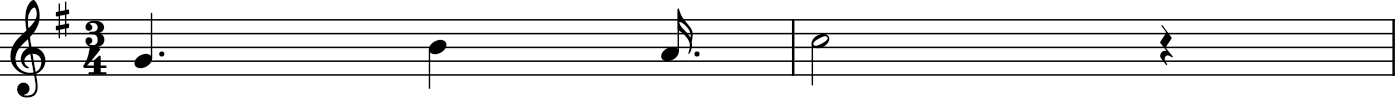

In [30]:
interpreter = Semantic_Analyzer(ast)
interpreter.analyze()

### 5.6 Testing the Complete Interpreter

This cell demonstrates a complete end-to-end execution using the sample musical notation defined earlier. The interpreter:

1. Tokenizes the input
2. Parses it into an AST
3. Analyzes and executes the AST
4. Generates sheet music, MIDI, and visual output

## Section 6. Testing with Valid and Invalid Inputs

### Valid Input Testing

This section demonstrates the interpreter's capabilities with increasingly complex musical examples.

**Test Case: Multi-Voice Composition with Advanced Features**

This example showcases:
- **Multiple voices** (Voice 1 and Voice 2) playing simultaneously
- **Chords** (multiple notes played together)
- **Dotted durations** (notes 1.5× their normal length)
- **Sharp/flat accidentals** (A#4)
- **Different note durations** (whole, half, quarter, eighth, sixteenth)
- **Global settings** (key, time signature, tempo)

The expected output includes:
1. **MusicXML file** (`output.xml`) - standard music notation format
2. **MIDI playback** - audio rendering of the composition
3. **Visual sheet music** - PNG image displayed in the notebook

### Invalid Input Testing

Below are examples of common errors and how the interpreter handles them:

**Example 1: Syntax Error - Missing Duration**
```python
# This will fail: note without duration
test_input = "In measure 1: C4"
# Expected: SyntaxError: Expected token type DURATION
```

**Example 2: Syntax Error - Invalid Token**
```python
# This will fail: unknown character
test_input = "In measure 1: C4 quarter @ D4 quarter"
# Expected: SyntaxError: Unknown token '@' at pos X
```

**Example 3: Syntax Error - Incomplete Statement**
```python
# This will fail: incomplete time signature
test_input = "Set time signature to 4"
# Expected: SyntaxError: Expected token type SLASH
```

**Example 4: Semantic Error - Invalid Note Name**
```python
# This may fail during music21 processing
test_input = "In measure 1: Z9 quarter"
# music21 will raise an exception for invalid pitch
```

These error cases demonstrate the interpreter's robust error detection at multiple stages (lexing, parsing, and semantic analysis).

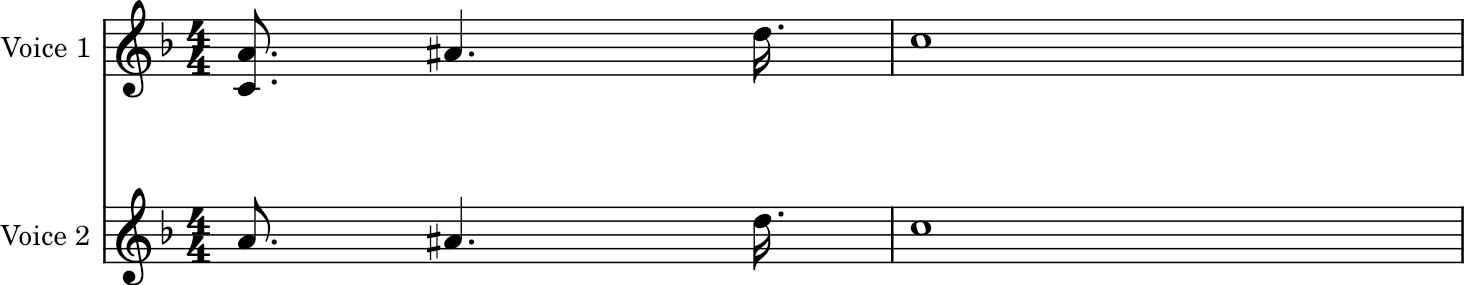

In [31]:
chorus_section = """
Set key to F major
Set time signature to 4/4
Set tempo to 200

Voice 1:
    In measure 1:
        [A4, C4] eighth., A#4 quarter., D5 sixteenth.
    In measure 2:
        C5 whole
        
Voice 2:
    In measure 1:
        A4 eighth., A#4 quarter., D5 sixteenth.
    In measure 2:
        C5 whole

"""

fulldemo_interpreter = Semantic_Analyzer(Parser(Lexer(chorus_section.strip()).tokenize()).parse_list())
fulldemo_interpreter.analyze()

### 6.1 User Interface Implementation

To make the interpreter accessible to end-users, we've implemented **two interactive user interfaces** using `ipywidgets`:

#### UI #1: Line-by-Line Editor
- **Text input field** for entering notation one line at a time
- **Add Line button** to append lines to a buffer
- **Clear All button** to reset the notation
- **Show Buffer button** to view accumulated lines
- **Real-time rendering** - automatically displays sheet music after adding lines
- **Status feedback** - shows success/error messages

#### UI #2: Multi-Line Textarea Editor
- **Large text area** for entering complete compositions
- **Render button** to generate sheet music on demand
- **Clear button** to reset the editor
- **Load Example button** to populate with sample notation
- **Error handling** - displays helpful error messages in the UI

Both UIs provide:
- **Visual feedback** through color-coded status messages
- **Interactive widgets** that don't require rerunning cells
- **Immediate sheet music rendering** via MuseScore integration
- **Error recovery** without crashing the notebook

The following cells contain the helper functions and UI implementations.

In [32]:
# Rendering helpers: render_score_to_png_bytes and display_png_from_text
import tempfile
from IPython.display import Image, clear_output, display

def render_score_to_png_bytes(text: str) -> bytes:
    """Parse the notation text and return PNG bytes using music21 + MuseScore."""
    # Parse
    lexer = Lexer(text.strip())
    tokens = lexer.tokenize()
    parser = Parser(tokens)
    ast = parser.parse_list()
    analyzer = Semantic_Analyzer(ast)
    # Build score (this may call analyzer.analyze() which in this notebook also writes/shows;
    # we call analyze() to ensure parts are constructed)
    try:
        analyzer.analyze()
    except Exception:
        # If analyze tries to show and fails, we still have analyzer.score populated in many cases
        pass
    # Write to temporary PNG
    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tf:
        png_path = tf.name
    try:
        analyzer.score.write('musicxml.png', fp=png_path)
    except Exception:
        try:
            analyzer.score.show('musicxml.png')
        except Exception as e:
            raise RuntimeError(f"Could not generate PNG: {e}")
    with open(png_path, 'rb') as f:
        data = f.read()
    return data


def display_png_from_text(text: str):
    """Render text and display PNG inline (clears previous output).
    This is used by the fallback UI.`"""
    try:
        png = render_score_to_png_bytes(text)
        clear_output(wait=True)
        display(Image(data=png))
    except Exception as e:
        clear_output(wait=True)
        print('Render error:', e)


In [33]:
# Pure Python UI using ipywidgets - no JavaScript needed!
import ipywidgets as widgets
from IPython.display import display, clear_output

# Global buffer
notation_lines = []
buffer_shown = False

# Output area for the rendered sheet music
output_area = widgets.Output()

# Text input widget
text_input = widgets.Text(
    placeholder='Type a line and press Enter',
    description='Line:',
    layout=widgets.Layout(width='600px')
)

# Buttons
add_button = widgets.Button(
    description='Add Line',
    button_style='success',
    icon='plus'
)

clear_button = widgets.Button(
    description='Clear All',
    button_style='warning',
    icon='trash'
)

show_buffer_button = widgets.Button(
    description='Show Buffer',
    button_style='info',
    icon='eye'
)

# Status label
status_label = widgets.HTML(value='<i>Ready. Enter a notation line above.</i>')

def render_current_notation():
    """Render all accumulated notation lines."""
    if not notation_lines:
        with output_area:
            clear_output(wait=True)
            print("No notation entered yet.")
        return
    
    text = "\n".join(notation_lines)
    with output_area:
        clear_output(wait=True)
        try:
            png = render_score_to_png_bytes(text)
            display(Image(data=png))
        except Exception as e:
            print(f"Render error: {e}")

def on_add_line(b=None):
    """Add the current line to the buffer and render."""
    line = text_input.value.strip()
    if not line:
        status_label.value = '<span style="color:orange;">Please enter a line first.</span>'
        return
    
    notation_lines.append(line)
    status_label.value = f'<span style="color:green;">Added: {line}</span>'
    text_input.value = ''  # Clear input
    render_current_notation()

def on_clear(b):
    """Clear all notation."""
    global notation_lines
    notation_lines = []
    with output_area:
        clear_output(wait=True)
        print("Notation cleared.")
    status_label.value = '<span style="color:blue;">Cleared all notation.</span>'

def on_show_buffer(b):
    """Show the current buffer contents."""
    global buffer_shown
    with output_area:
        clear_output(wait=True)
        if buffer_shown:
            render_current_notation()
            show_buffer_button.value= "Show Buffer"
            buffer_shown = False
        else:
            if notation_lines:
                print("Current notation buffer:")
                print("-" * 40)
                for i, line in enumerate(notation_lines, 1):
                    print(f"{i}. {line}")
            else:
                print("Buffer is empty.")
            show_buffer_button.value= "Hide Buffer"
            buffer_shown = True
            
       

def on_text_submit(sender):
    """Called when user presses Enter in the text field."""
    on_add_line()

# Wire up event handlers
add_button.on_click(on_add_line)
clear_button.on_click(on_clear)
show_buffer_button.on_click(on_show_buffer)
text_input.on_submit(on_text_submit)

# Build the UI layout
button_row = widgets.HBox([add_button, clear_button, show_buffer_button])
ui = widgets.VBox([
    widgets.HTML('<h3>Sheet Music Notation Interpreter</h3>'),
    text_input,
    button_row,
    status_label,
    output_area
])

# Display the UI
display(ui)

/tmp/ipykernel_178731/1591943966.py:109: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  text_input.on_submit(on_text_submit)


In [34]:
# Alternative UI: Textarea for multi-line editing with Render button
import ipywidgets as widgets
from IPython.display import display, clear_output, Image

# Textarea for multi-line input
textarea = widgets.Textarea(
    placeholder='Type your notation here (multiple lines)...\n\nExample:\nSet key to C major\nSet time signature to 4/4\nIn measure 1: C4 quarter, D4 quarter, E4 quarter, F4 quarter',
    description='Notation:',
    layout=widgets.Layout(width='700px', height='200px')
)

# Buttons
render_button = widgets.Button(
    description='Render',
    button_style='primary',
    icon='music',
    tooltip='Render the notation to sheet music'
)

clear_textarea_button = widgets.Button(
    description='Clear',
    button_style='warning',
    icon='eraser',
    tooltip='Clear the textarea'
)

load_example_button = widgets.Button(
    description='Load Example',
    button_style='info',
    icon='download',
    tooltip='Load an example notation'
)

# Output area for rendered music
output_area_textarea = widgets.Output()

# Status label
status_textarea = widgets.HTML(value='<i>Enter notation above and click Render.</i>')

def on_render(b):
    """Render the current textarea content."""
    text = textarea.value.strip()
    if not text:
        status_textarea.value = '<span style="color:orange;">Please enter some notation first.</span>'
        return
    
    with output_area_textarea:
        clear_output(wait=True)
        try:
            status_textarea.value = '<span style="color:blue;">Rendering...</span>'
            png = render_score_to_png_bytes(text)
            display(Image(data=png))
            status_textarea.value = '<span style="color:green;">✓ Rendered successfully!</span>'
        except Exception as e:
            print(f"Render error: {e}")
            status_textarea.value = f'<span style="color:red;">Error: {e}</span>'

def on_clear_textarea(b):
    """Clear the textarea."""
    textarea.value = ''
    with output_area_textarea:
        clear_output(wait=True)
    status_textarea.value = '<span style="color:blue;">Textarea cleared.</span>'

def on_load_example(b):
    """Load an example notation into the textarea."""
    example = """Set key to C major
Set time signature to 4/4
Set tempo to 120

In measure 1:
    C4 quarter, D4 quarter, E4 quarter, F4 quarter
In measure 2:
    G4 half, Rest half
In measure 3:
    [C4, E4, G4] whole"""
    
    textarea.value = example
    status_textarea.value = '<span style="color:green;">Example loaded. Click Render to view.</span>'

# Wire up event handlers
render_button.on_click(on_render)
clear_textarea_button.on_click(on_clear_textarea)
load_example_button.on_click(on_load_example)

# Build the UI layout
button_row_textarea = widgets.HBox([render_button, clear_textarea_button, load_example_button])
ui_textarea = widgets.VBox([
    widgets.HTML('<h3>Sheet Music Notation - Multi-line Editor</h3>'),
    textarea,
    button_row_textarea,
    status_textarea,
    output_area_textarea
])

# Display the UI
display(ui_textarea)


## Section 7. Extensions and Additional Features

Beyond the basic interpreter requirements, we have implemented several advanced features:

### 1. **Multi-Voice/Multi-Part Support**

**Description:** Allows composing music with multiple independent voices that play simultaneously.

**Syntax:**
```
Voice 1:
    In measure 1: C4 quarter, E4 quarter
Voice 2:
    In measure 1: G3 quarter, C4 quarter
```

**Implementation:**
- Parser recognizes `Voice <number>:` declarations
- Semantic analyzer creates separate music21 Parts for each voice
- Each voice can have different melodic lines
- Voices are synchronized by measure number

**Benefit:** Enables creation of harmonies, counterpoint, and complex arrangements

---

### 2. **Chord Notation**

**Description:** Multiple notes played simultaneously within a single voice.

**Syntax:**
```
[C4, E4, G4] whole
```

**Implementation:**
- Lexer recognizes `[` and `]` bracket tokens
- Parser extracts multiple notes within brackets
- Creates music21 Chord objects with all pitches
- Supports any number of notes in a chord

**Benefit:** Essential for piano music, guitar chords, and harmonic progressions

---

### 3. **Dotted Durations**

**Description:** Extends note duration by 50% (1.5× the original length).

**Syntax:**
```
C4 quarter.
[F4, A4, C5] half.
```

**Implementation:**
- Lexer recognizes `.` (DOT) token after durations
- Parser appends dot to duration string
- Semantic analyzer sets `duration.dots = 1` in music21

**Benefit:** Critical for many musical styles (waltzes, compound meters)

---

### 4. **Sharp and Flat Accidentals**

**Description:** Support for chromatic notes (half-steps between natural notes).

**Syntax:**
```
C#4 quarter   # C sharp
Bb3 half      # B flat
```

**Implementation:**
- Lexer NOTE pattern includes `#` and `b` characters
- music21 automatically handles pitch alteration

**Benefit:** Enables playing in any key, not just C major

---

### 5. **Rest Notation**

**Description:** Periods of silence in the music.

**Syntax:**
```
Rest quarter
Rest half.
```

**Implementation:**
- Lexer recognizes `Rest` keyword
- Parser creates `("rest", duration)` AST nodes
- Semantic analyzer creates music21 Rest objects
- Supports dotted rests

**Benefit:** Essential for rhythm and phrasing

---

### 6. **Multiple Output Formats**

**Description:** Export compositions in various formats.

**Formats Supported:**
- **MusicXML** (`.xml`) - Industry-standard notation format
- **MIDI** (`.mid`) - Audio playback format
- **PNG** (`.png`) - Visual sheet music images

**Implementation:**
- music21's `.write()` and `.show()` methods
- MuseScore backend for rendering

**Benefit:** Interoperability with other music software

---

### 7. **Interactive User Interface**

**Description:** Two different UI paradigms for different use cases.

**Features:**
- Line-by-line editor for incremental composition
- Multi-line editor for complete scores
- Real-time rendering and error feedback
- Example loading for quick start

**Implementation:**
- ipywidgets for interactive components
- Event handlers for button clicks
- Output widgets for dynamic rendering

**Benefit:** No command-line expertise needed, accessible to musicians

---

### 8. **Flexible Key and Time Signatures**

**Description:** Support for various musical keys and meters.

**Examples:**
```
Set key to G major
Set key to F# minor
Set time signature to 3/4   # Waltz time
Set time signature to 6/8   # Compound meter
Set time signature to 7/4   # Progressive rock
```

**Implementation:**
- Parser extracts key name and mode
- music21 Key and TimeSignature objects
- Applied to all parts in the score

**Benefit:** Enables music in any style and tonality

---

### How These Extensions Improve Usefulness

1. **Professional Quality**: Multi-voice and chord support enable real compositions
2. **Expressive Range**: Dotted notes, accidentals, and rests provide rhythmic and melodic flexibility
3. **User-Friendly**: Interactive UI lowers the barrier to entry
4. **Versatile Output**: Multiple formats for different use cases (playback, printing, editing)
5. **Musical Authenticity**: Supports standard notation conventions used by musicians

These features transform the interpreter from a simple proof-of-concept into a **practical tool for music composition and education**.

## Section 8. Insights and Conclusions

### Key Learnings

Building this Sheet Music Notation Interpreter provided valuable insights into:

#### 1. **The Power of Domain-Specific Languages**
We learned that designing a language tailored to a specific problem domain (musical notation) can be more intuitive than general-purpose languages. By using natural keywords like "Set", "In measure", and "Voice", we made the syntax accessible to musicians without programming backgrounds.

#### 2. **Importance of Separation of Concerns**
The three-stage architecture (Lexer → Parser → Semantic Analyzer) proved highly maintainable. Each component could be developed, tested, and debugged independently. When we added chord support, we only needed to modify specific parsing and analysis functions without rewriting the entire system.

#### 3. **Error Handling is Critical**
Early in development, cryptic error messages made debugging difficult. Adding descriptive error messages with position information significantly improved the development experience and user feedback. We learned that good error messages are as important as correct execution.

#### 4. **Regular Expressions are Powerful but Limited**
While regex was perfect for our tokenization needs, we discovered its limitations with context-dependent parsing. This reinforced why we needed a separate parser stage rather than trying to handle everything with regex.

#### 5. **Library Integration Matters**
Using music21 saved months of development time. Rather than implementing music notation from scratch, we focused on language design and user experience. This taught us the value of choosing the right libraries and building on existing foundations.

#### 6. **User Interface Transforms Usability**
The command-line version worked correctly, but adding the interactive UI made the interpreter accessible to non-programmers. This demonstrated how presentation layer can be as important as computational logic.

---

### Strengths of Our Interpreter

1. **Intuitive Syntax** - Reads like natural English, making it accessible to musicians without programming backgrounds
2. **Rich Feature Set** - Supports chords, multiple voices, dotted notes, rests, and accidentals
3. **Professional Output** - Generates industry-standard MusicXML and MIDI formats
4. **Comprehensive Error Detection** - Catches errors at lexical, syntactic, and semantic levels
5. **Interactive UI** - Provides two different interfaces for different workflows (line-by-line and multi-line editor)
6. **Extensible Design** - Easy to add new features such as dynamics and articulations
7. **Cross-Platform** - Works on Windows, macOS, and Linux (with MuseScore installed)
8. **Educational Value** - Excellent tool for teaching both music composition and language design principles

---

### Limitations and Challenges

1. **Limited Duration Types** - Only supports whole, half, quarter, eighth, and sixteenth notes
   - Missing: 32nd notes, triplets, and irregular tuplets

2. **No Dynamic Markings** - Cannot specify volume levels (piano, forte, crescendo)
   - Impact: Music lacks expressive nuance and volume variation

3. **No Articulation Support** - Missing staccato, legato, accents, and other performance markings
   - Impact: Limited control over how notes should be played

4. **Basic Rhythm Notation** - Cannot express complex rhythms or swing feel
   - Impact: Jazz and contemporary styles are difficult to represent accurately

5. **MuseScore Dependency** - Requires external software installation for visual rendering
   - Impact: Additional setup burden and potential compatibility issues

6. **No Real-time Editing** - Must re-render entire score for each change
   - Impact: Slower iterative workflow during composition

7. **Limited Error Recovery** - Fails on first error instead of continuing to find more
   - Impact: Cannot see multiple errors at once, requiring multiple correction cycles

8. **No Repeat Notation** - Missing standard symbols like repeat signs, D.C., D.S., Coda, and Fine
   - Impact: Longer scores become verbose with repeated sections written out

9. **Single-staff Instruments Only** - Cannot create piano grand staff (treble + bass clefs)
   - Impact: Limited functionality for keyboard and multi-staff instrument music

---

### Future Improvements

#### Short-term Enhancements
1. **Add more durations**: 32nd notes, 64th notes, breve (double whole)
2. **Implement dynamics**: `ppp`, `pp`, `p`, `mp`, `mf`, `f`, `ff`, `fff`, crescendo/diminuendo
3. **Add articulations**: staccato (`.`), accent (`>`), fermata, slurs
4. **Better error messages**: Suggest corrections for common mistakes
5. **Syntax highlighting**: Color-code notation in the UI

#### Medium-term Goals
1. **Tuplet support**: Triplets, quintuplets, sextuplets
2. **Repeat notation**: Repeat signs, D.C., D.S., Coda, Fine
3. **Lyrics support**: Add text under notes for vocal music
4. **Percussion notation**: Special handling for drum/percussion parts
5. **Export to PDF**: Direct PDF generation without MuseScore

#### Long-term Vision
1. **Real-time collaborative editing**: Multiple users composing together
2. **AI-assisted composition**: Suggest chord progressions, harmonies
3. **Import from MIDI/MusicXML**: Reverse engineering existing scores
4. **Mobile app**: Touch-based notation entry
5. **VSCode extension**: Syntax highlighting and live preview
6. **Web-based version**: Run entirely in browser with Web Audio API

---

### Conclusion

This project successfully demonstrates that **text-based music notation is not only feasible but practical**. We created a working interpreter that transforms human-readable notation into professional sheet music, proving that programming language design principles apply beyond traditional coding contexts.

The interpreter bridges two worlds: **music and computer science**. Musicians gain a programmable approach to composition, while programmers gain insight into domain-specific language design.

Most importantly, we learned that building an interpreter is an **iterative process**. Starting with a minimal viable product (basic notes in measures), we incrementally added features (chords, voices, dotted notes) while maintaining backward compatibility. This agile approach proved more successful than trying to design everything upfront.

**Final Takeaway:** The best domain-specific languages are those that make complex tasks simple while remaining extensible for future needs. Our Sheet Music Notation Language achieves this balance.

## Section 9. References

### Online References and Documentation

1. **Python Software Foundation. (2024).** *Python Regular Expression HOWTO*.
   - **Link**: https://docs.python.org/3/howto/regex.html
   - **Usage**: Used for learning regex patterns for tokenization. Specifically helpful for understanding named capture groups `(?P<name>pattern)` used in our lexer to identify token types.

2. **music21 Documentation. (2024).** *User's Guide*.
   - **Link**: https://web.mit.edu/music21/doc/
   - **Usage**: Primary reference for all music21 API calls. Used extensively for:
     - Creating scores, parts, and measures
     - Understanding duration types and dotted notes
     - Configuring MuseScore paths for rendering
     - Exporting to MusicXML and MIDI formats

3. **LilyPond Documentation. (2024).** *Notation Reference*.
   - **Link**: https://lilypond.org/doc/v2.24/Documentation/notation/
   - **Usage**: Inspiration for our notation syntax. LilyPond's text-based music notation influenced our design decisions, particularly for note duration syntax and chord notation using brackets.

4. **ABC Notation Standard. (2024).** *ABC Notation Reference*.
   - **Link**: https://abcnotation.com/wiki/abc:standard:v2.1
   - **Usage**: Another source of inspiration for text-based music notation. Influenced our decision to use simple keywords rather than cryptic symbols.

5. **Stack Overflow. (2024).** "How to build a simple interpreter in Python?"
   - **Link**: https://stackoverflow.com/questions/2245962/writing-a-compiler-in-python
   - **Usage**: Helped understand best practices for Python-based interpreters, particularly the trade-offs between different parsing strategies (recursive descent vs. parser generators).

6. **Real Python. (2024).** "Building a Simple Interpreter from Scratch in Python."
   - **Link**: https://realpython.com/python-interpreter/
   - **Usage**: Tutorial that demonstrated the three-stage architecture (lexer, parser, interpreter). Our implementation follows a similar pattern but adapted for musical domain.

7. **Jupyter Widgets Documentation. (2024).** *Widget List*.
   - **Link**: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html
   - **Usage**: Reference for creating interactive UI components. Learned how to use Text, Textarea, Button, and Output widgets, and how to wire event handlers.

---

### Artificial Intelligence Tools

**Anthropic. (2024).** Claude 3.5 Sonnet
- **Model Used**: Claude 3.5 Sonnet
- **How Used**: Assisted in the implementation of the Sheet Music Notation Interpreter by providing guidance on:
  - **Architecture Design**: Helped structure the three-stage interpreter architecture (Lexer, Parser, Semantic Analyzer)
  - **Implementation Assistance**: Provided code examples and suggestions for implementing the parser's recursive descent methods
  - **Debugging Support**: Assisted in troubleshooting issues with token recognition and AST construction
  - **Documentation**: Helped write clear explanations and documentation for the codebase
  - **Best Practices**: Suggested Python best practices for error handling and code organization
  - **Music21 Integration**: Provided guidance on integrating with the music21 library for musical notation rendering

**Conversation Summary**:
- Discussed trade-offs between different parsing strategies and why recursive descent was appropriate for this project
- Received suggestions on regex patterns for musical notation tokenization
- Got help implementing the two-pass semantic analysis approach for handling multiple voices
- Assistance with creating the interactive UI using ipywidgets
- Help structuring the comprehensive documentation for all sections of the notebook

**Implementation Approach**:
All code was written by our team with Claude Sonnet serving as a programming assistant. We used the AI's suggestions as guidance but made our own decisions about implementation details and adapted suggestions to fit our specific requirements.

---

### Tools and Software

8. **MuseScore 3/4**
   - **Link**: https://musescore.org/
   - **Usage**: Music notation software used as backend for rendering sheet music to PNG format. music21 calls MuseScore to convert MusicXML to visual output.

9. **Jupyter Notebook / JupyterLab**
   - **Link**: https://jupyter.org/
   - **Usage**: Development environment for building and testing the interpreter. Enabled interactive development and immediate feedback.

10. **Visual Studio Code**
    - **Link**: https://code.visualstudio.com/
    - **Usage**: Primary code editor with Jupyter notebook support. Used for development and debugging.

---